In [57]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(1)

In [58]:
#load the dataset. 
X, Y = load_planar_dataset()
print(type(X))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
(2, 400)
(1, 400)


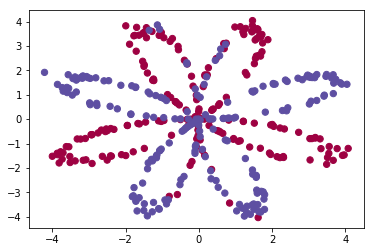

In [59]:
plt.scatter(X[0, :], X[1,:], c = Y.ravel(), s = 40, cmap = plt.cm.Spectral);
#colors = plt.cm.Spectral(np.linspace(0, 1, 10))

#plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [60]:
#let us look at the shape of the dataset again
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]

print('The shape of X is :' + str(shape_X))
print("The shape of Y is : " + str(shape_Y))
print('I have m = %d training examples!' %(m))

The shape of X is :(2, 400)
The shape of Y is : (1, 400)
I have m = 400 training examples!


In [61]:
#Training with regular logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();

clf.fit(X.T, (Y.T).ravel());

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


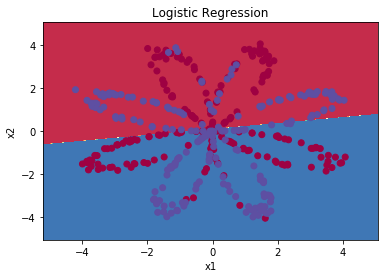

In [90]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel())
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [98]:
#lets initialize the dimentions of the nn- layers
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

#initialize the model parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    W2 = np.random.randn(n_y, n_h) * 0.01
    b1 = np.zeros((n_h, 1))
    b2 = np.zeros((n_y, 1))
    parameters = {"W1":W1, "W2":W2, "b1":b1, "b2":b2}
    return parameters

def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1 = np.matmul(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2) # this is one of the functions we imported and its better to use it here since we need a real btw 0 and 1
    
    cache = {"Z1": Z1, "Z2": Z2, "A1":A1, "A2":A2}
    
    return A2, cache


#COST FUNCTION
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = np.dot(Y, (np.log(A2)).T) + np.dot((1 - Y), (np.log(1 - A2)).T)
    cost = (-1 / m) * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost


def back_propagation(parameters, cache, X, Y):     #cache = {"Z1": Z1, "Z2": Z2, "A1":A1, "A2":A2}
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    
    dZ2 = A2 - Y
    dW2 = (1 /m) * np.dot(dZ2, A1.T)
    db2 = (1/ m) * np.sum(dZ2, axis= 1, keepdims= True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/ m) * np.dot(dZ1, X.T)
    db1 = (1/ m) * np.sum(dZ1, axis= 1, keepdims= True)
    
    grads =  {"dW1": dW1, "db1":db1, "dW2":dW2, "db2": db2}
    
    return grads

def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1":W1, "W2":W2, "b1":b1, "b2":b2}
    
    return parameters

def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    
    predicions = (A2 > 0.5)

    return predicions
    

## Now to combine all the functions we have written

In [96]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    
    np.random.seed(3)
    n_x, n_y = layer_sizes(X, Y)[0], layer_sizes(X, Y)[2]
    #n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = back_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
    
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters
    
    
    
    

In [99]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.666666666667


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219504
Cost after iteration 9000: 0.218571


Text(0.5,1,'Decision Boundary for hidden layer size 4')

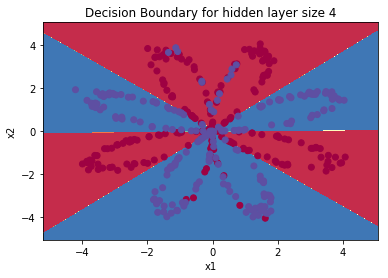

In [101]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
plt.title("Decision Boundary for hidden layer size " + str(4))

In [102]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 90.75 %
Accuracy for 100 hidden units: 91.0 %


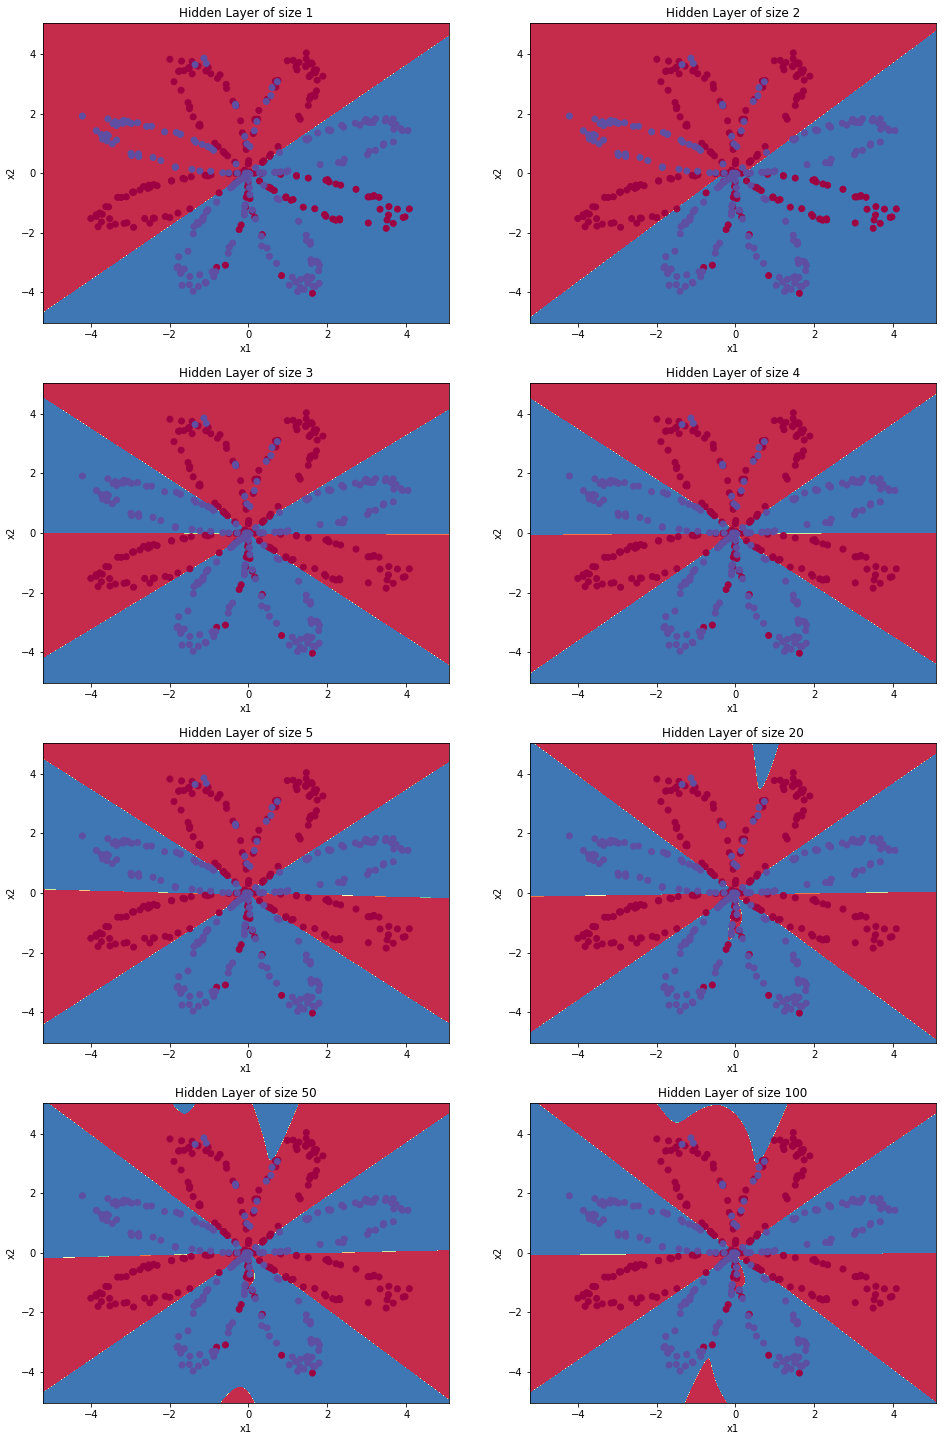

In [104]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))